# 用于手写数字识别的神经网络，二分类

在本练习中，您将使用神经网络来识别手写数字0和1。

# 大纲
- [ 1 - 包 ](#1)
- [ 2 - 神经网络](#2)
  - [ 2.1 问题描述](#2.1)
  - [ 2.2 数据集](#2.2)
  - [ 2.3 模型表示](#2.3)
  - [ 2.4 Tensorflow 模型实现](#2.4)
    - [ 练习 1](#ex01)
  - [ 2.5 Numpy 模型实现(Numpy 中的 Forward Prop)](#2.5)
    - [ 练习 2](#ex02)
  - [ 2.6 矢量化 NumPy 模型实现（可选）](#2.6)
    - [ 练习 3](#ex03)
  - [ 2.7 恭喜！](#2.7)
  - [ 2.8 Numpy 广播教程（可选）](#2.8)


<a name="1"></a>
## 1 - 包

首先，让我们运行下面的单元格来导入您在此分配期间需要的所有包。
- [numpy](https://numpy.org/) 是使用 Python 进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是一个在 Python 中绘制图形的流行库。
- [tensorflow](https://www.tensorflow.org/) 是一个流行的机器学习平台。

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow 是谷歌开发的机器学习包。2019年，谷歌将Keras集成到Tensorflow中，发布了Tensorflow 2.0。
Keras 是由 François Chollet 独立开发的框架，它为 Tensorflow 创建了一个简单的、以层为中心的接口。
本课程将使用 Keras 界面。

<a name="2"></a>
## 2 - 神经网络

在课程 1 中，您实施了逻辑回归。这被扩展为使用多项式回归处理非线性边界。对于更复杂的场景，例如图像识别，神经网络是首选。
<a name="2.1"></a>
### 2.1 问题描述

在本练习中，您将使用神经网络来识别两个手写数字，0和1。这是一个二元分类任务。自动手写数字识别如今已广泛使用——从识别邮件信封上的邮政编码（postal code）到识别银行支票上的金额。在未来的作业中，您将扩展此网络以识别所有 10 位数字 (0-9)。

<a name="2.2"></a>
### 2.2 数据集

您将首先为此任务加载数据集。 
- 如下所示 `load_data()` 函数将数据加载到变量 `X` 和 `y`


- 该数据集包含 1000 个手写数字 $^1$ 的训练示例，这里限制为 0 和 1。

    - 每个训练示例都是数字的 20 像素 x 20 像素灰度图像。
        - 每个像素由一个浮点数表示，表示该位置的灰度强度。
        - 20 x 20 像素网格被“展开”成一个 400 维向量。
        - 每个训练示例都成为我们数据矩阵 `X` 中的一行。
        - 这给了我们一个 1000 x 400 矩阵 `X` ，其中每一行都是手写数字图像的训练示例。

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- 训练集的第二部分是一个 1000 x 1 维向量 `y` ，其中包含训练集的标签
    - 如果图像是数字 `0`，则 `y=0`；如果图像是数据 `1`，则 `y=1`。

$^1$<sub> 这是MNIST手写数字数据集的一个子集 (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 查看变量
让我们更熟悉您的数据集。
- 一个好的开始是打印出每个变量并查看它包含的内容。

下面的代码打印变量 `X` 和 `y` 的元素。

In [3]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 检查变量的维度

熟悉数据的另一种方法是查看其维度。请打印 `X` 和 `y` 的形状，看看你的数据集中有多少训练样例。

In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 可视化数据

您将从可视化训练集的一个子集开始。
- 在下面的单元格中，代码从 `X` 中随机选择 64 行，将每行映射回 20 x 20 像素的灰度图像，并将图像一起显示。
- 每个图像的标签显示在图像上方

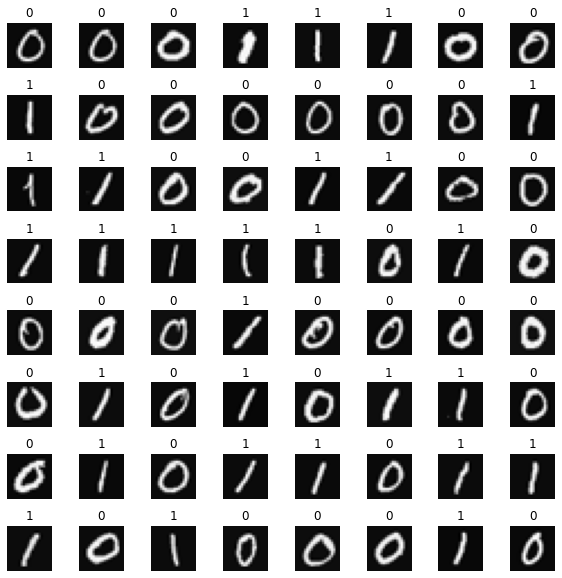

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 模型表示

您将在此作业中使用的神经网络如下图所示。
- 这具有三个具有 sigmoid 激活函数的稠密层。
    - 回想一下，您的输入是数字图像的像素值。
    - 由于图像的大小为 $20\times20$，这给了我们 $400$ 的输入
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- 这些参数的尺寸用于神经网络，在第1层为$25$单位，在第2层为$15$单位，在第3层为$1$输出单位.

    - 回想一下，这些参数的维度确定如下：
        - 如果网络在一层有 $s_{in}$ 个单元，在下一层有 $s_{out}$ 个单元，那么
            - $W$ 的维度为 $s_{in} \times s_{out}$。
            - $b$ 将是一个带有 $s_{out}$ 个元素的向量
  
    - 因此， `W` 和 `b` 的形状为： 
        - layer1：`W1`的形状是(400, 25)，`b1`的形状是(25,)
        - layer2：`W2`的形状是(25, 15)，`b2`的形状是：(15,)
        - layer3：`W3`的形状是(15, 1)，`b3`的形状是：(1,)
>**注意:** 偏置向量 `b` 可以表示为一维 (n,) 或二维 (n,1) 数组。Tensorflow 使用一维表示，本实验室将保持该约定：               

<a name="2.4"></a>
### 2.4 Tensorflow 模型实现


TensorFlow 模型是逐层构建的。为您计算图层的输入尺寸（上面的 $s_{in}$）。您指定一个层的*输出尺寸*，这将确定下一层的输入尺寸。第一层的输入维度是从下面的 `model.fit` 语句中指定的输入数据的大小得出的。
>**注意:** 也可以添加一个输入层，指定第一层的输入维度。例如：
`tf.keras.Input(shape=(400,)),    #specify input shape`  
我们将在此处阐明一些模型尺寸。

<a name="ex01"></a>
### 练习 1

下面，使用带有Sigmoid激活函数的 Keras [Sequential model](https://keras.io/guides/sequential_model/) 和 [Dense Layer](https://keras.io/api/layers/core_layers/dense/) 构建上述网络。

In [7]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid', name = 'layer1'),
        Dense(15, activation='sigmoid', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'layer3')
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>预期输出（点击展开） </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

In [9]:
# UNIT TESTS
from public_tests import * 

test_c1(model)

All tests passed!


摘要中显示的参数计数对应于权重和偏差数组中的元素数量，如下所示。

In [10]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


让我们进一步检查权重，以验证 tensorflow 产生的维度与我们上面计算的相同。

In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**预期输出**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights` 返回一个 NumPy 数组。也可以直接以张量形式访问权重。注意最后一层中张量的形状。

In [13]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.3217479 ],
       [ 0.5579645 ],
       [-0.0091033 ],
       [-0.30858648],
       [-0.07151276],
       [ 0.03164613],
       [-0.4185236 ],
       [-0.02524269],
       [-0.01181674],
       [ 0.33975667],
       [ 0.06925339],
       [ 0.0025534 ],
       [ 0.22575456],
       [-0.47971964],
       [-0.18276942]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


以下代码将定义一个损失函数并运行梯度下降以使模型的权重适合训练数据。这将在下周更详细地解释。

In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6371
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5168
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3927
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2865
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1569
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0991
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0605
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 13/20
32/32 [==============================

要在示例上运行模型以进行预测，请使用 [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)。`predict` 的输入是一个数组，因此单个示例被重新整形为二维。

In [15]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 54ms/step
 predicting a zero: [[0.02203244]]
1/1 [==============================] - 0s 17ms/step
 predicting a one:  [[0.981101]]


模型的输出被解释为概率。
在上面的第一个示例中，输入为零。该模型预测输入为 1 的概率几乎为零。
在第二个示例中，输入为 1。该模型预测输入为 1 的概率接近 1。
与逻辑回归的情况一样，将概率与阈值进行比较以做出最终预测。

In [16]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


让我们比较 64 位随机样本的预测和标签。这需要一点时间来运行。

1/1 [==============================] - 0s 17ms/step


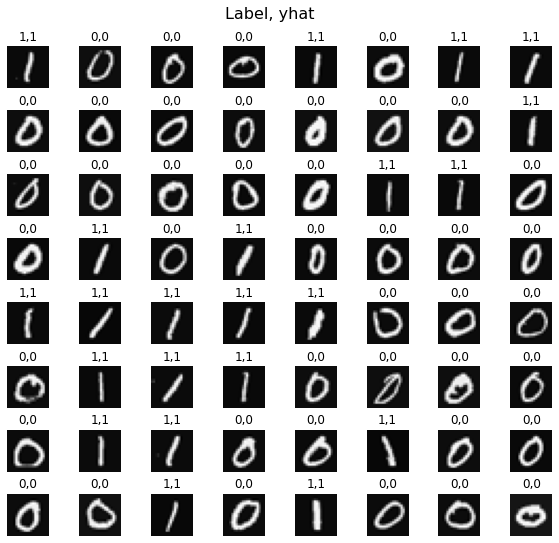

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 Numpy 模型实现（Numpy 中的 Forward Prop）
如讲座中所述，可以使用 Numpy 构建自己的稠密层。然后可以利用它来构建多层神经网络。

<img src="images/C2_W1_dense2.PNG" width="600" height="450">


<a name="ex02"></a>
### 练习 2

下面，构建一个密集层子程序。讲座中的示例使用 for 循环访问层中的每个单元 (`j`) 并执行该单元的权重的点积 (`W[:,j]`) 并求和该单元的偏差 (`b[j]`) 形成`z`。
然后将激活函数 `g(z)` 应用于该结果。本节将不使用可选讲座中描述的一些矩阵运算。这些将在后面的部分中进行探讨。

In [19]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ### 
    from tensorflow.python.ops.numpy_ops import np_config
    np_config.enable_numpy_behavior()
    a_out = g(a_in@W+b)
        
        
        
### END CODE HERE ### 
    return(a_out)


In [20]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor([0.54735762 0.57932425 0.61063923], shape=(3,), dtype=float64)


**预期输出**
```
[0.54735762 0.57932425 0.61063923]
```da

In [21]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


下面的单元利用上面的 `my_dense` 子例程构建一个三层神经网络。

In [22]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

我们可以从 Tensorflow 复制经过训练的权重和偏差。

In [23]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [24]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


运行以下单元格以查看来自 Numpy 模型和 Tensorflow 模型的预测。这需要一点时间来运行。

1/1 [==============================] - 0s 18ms/step


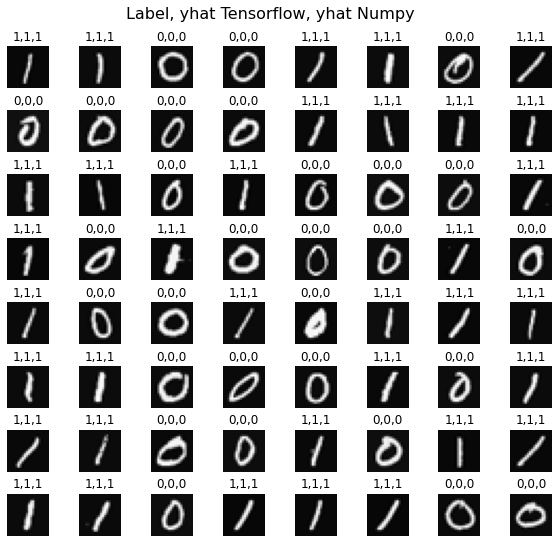

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 矢量化 NumPy 模型实现（可选）
可选讲座描述了可用于加速计算的向量和矩阵运算。
下面描述了一个层操作，它计算给定输入示例上层中所有单元的输出：

<img src="images/C2_W1_VectorMatrix.PNG" width="600" height="450">

我们可以使用上面的示例 `X` 和 `W1`、`b1` 参数来演示这一点。我们使用 `np.matmul` 来执行矩阵乘法。
请注意，x 和 W 的尺寸必须如上图所示兼容。

In [26]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


您可以更进一步，在一次矩阵-矩阵运算中计算所有示例的所有单位。

<img src="images/C2_W1_MatrixMatrix.PNG" width="600" height="450">
完整的运算是$\mathbf{Z}=\mathbf{XW}+\mathbf{b}$。这将利用 NumPy 广播将 $\mathbf{b}$ 扩展到 $m$ 行。如果不熟悉，笔记本末尾提供了一个简短的教程。

<a name="ex03"></a>
### 练习 3

下面，编写一个新的 `my_dense_v` 子例程，为示例矩阵执行层计算。这将利用 `np.matmul()`。

In [27]:
# UNQ_C3
# GRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    A_out = g(A_in@W + b)
    
### END CODE HERE ### 
    return(A_out)

In [28]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


**预期输出**

```
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
 ```

In [29]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


下面的单元使用上面的 `my_dense_v` 子例程构建了一个三层神经网络。

In [30]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

我们可以再次从 Tensorflow 复制经过训练的权重和偏差。

In [31]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

让我们用新模型进行预测。这将一次对*所有示例进行预测*。注意输出的形状。

In [1]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

NameError: name 'my_sequential_v' is not defined

我们将像以前一样应用 0.5 的阈值，但同时应用于所有预测。

In [2]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

NameError: name 'Prediction' is not defined

运行以下单元格以查看预测。这将使用我们刚刚在上面计算的预测。
这需要一点时间来运行。

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

您可以看到其中一张错误分类的图像的外观。

In [ ]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

<a name="2.7"></a>
### 2.7 恭喜！
您已成功构建并使用了神经网络。

<a name="2.8"></a>
### 2.8 NumPy 广播教程（可选）


在最后一个例子中，$\mathbf{Z}=\mathbf{XW} + \mathbf{b}$ 利用 NumPy 广播来扩展向量 $\mathbf{b}$。如果您不熟悉 NumPy 广播，我们提供了这个简短的教程。
$\mathbf{XW}$ 是一个维度为 $(m,j_1)(j_1,j_2)$ 的矩阵-矩阵运算，它产生一个维度为 $(m,j_2)$ 的矩阵。为此，我们添加一个维度为 $(1,j_2)$ 的向量 $\mathbf{b}$。$\mathbf{b}$ 必须扩展为 $(m,j_2)$ 矩阵，才能使这种逐元素操作有意义。这种扩展是由 NumPy 广播为您完成的。

广播适用于元素操作。
它的基本操作是通过复制元素以匹配更大的维度来“拉伸”更小的维度。

更多请见 [specifically](https://NumPy.org/doc/stable/user/basics.broadcasting.html): 
当对两个数组进行操作时，NumPy 会逐元素比较它们的形状。它从尾随（即最右边）尺寸开始，然后向左工作。
两个维度兼容时：
- 它们是相等的，或者
- 其中一个是 1   

如果不满足这些条件，则会抛出 Value Error:operands could not be broadcast together 异常，表明数组具有不兼容的形状。结果数组的大小是沿输入的每个轴不为 1 的大小。
这里有些例子：

<figure>
    <center> <img src="./images/C2_W1_Assign1_BroadcastIndexes.PNG"  alt='missing' width="400"  ><center/>
    <figcaption>计算广播结果形状</figcaption>
<figure/>

下图描述了扩展尺寸。注意下面的红色文字：

<figure>
    <center> <img src="./images/C2_W1_Assign1_Broadcasting.gif"  alt='missing' width="600"  ><center/>
    <figcaption>广播在概念上扩展参数以匹配元素相关的操作</figcaption>
<figure/>

上图显示 Num Py 在最终操作之前扩展参数以匹配。请注意，这是一个概念描述。Num Py 操作的实际机制选择最有效的实现。
对于以下每个示例，在运行示例之前尝试猜测结果的大小。

In [ ]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

请注意，这适用于所有元素操作：

In [ ]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

<figure>
    <img src="./images/C2_W1_Assign1_VectorAdd.PNG"  alt='missing' width="740" >
    <center><figcaption><b>行-列元素操作</b></figcaption></center>
<figure/>

In [ ]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

这是您在上面构建的密集层中的场景。将一维向量 $b$ 添加到 (m,j) 矩阵。
<figure>
    <img src="./images/C2_W1_Assign1_BroadcastMatrix.PNG"  alt='missing' width="740" >
    <center><figcaption><b>矩阵 + 一维向量</b></figcaption></center>
<figure/>